Repressilator simulated as detailed in the Material and Methods section of the Niederholtmayer/Maerkl paper.

Adaptable for n nodes with varying parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

$g_i$: Genes

$r_i$: mRNAs

$p_i$: Proteins

$$ \dot r_i = -(a_i + \mu) r_i + \beta_i g_i \frac{K_{i-1}^{\nu_i}}{K_{i-1}^{\nu_i} + p_{i-1}^{\nu_i}} $$

$$ \dot p_i = -(b_i + \mu) p_i + c_i r_i $$

In [2]:
# ODE system

def repressilator(y, t, a, b, beta, c, K, nu, g, mu):
    n = len(y)/2
    r = np.array(y[0:n])
    p = np.array(y[n:2*n])
    p_shift = np.roll(p,1) # p_{i-1}
    
    drdt = -(a + mu)*r + beta*g/(1+np.power(p_shift/np.roll(K,1),nu))
    dpdt = -(b + mu)*p + c*r
    return np.append(drdt,dpdt)

In [3]:
# Parameters

# From Materials and Methods / Model
# Identical parameters for now, asyymetry possible

# Degradation rate of mRNAs (1/min)
a = np.array([np.log(2)/8.,np.log(2)/8.,np.log(2)/8.])
# Degradatoin rate of proteins (1/min)
b = np.array([np.log(2)/90.,np.log(2)/90.,np.log(2)/90.])
# Transcription rate
beta = 0.4
# Translation rate
c = np.array([0.5,0.5,0.5])
# Michaelis Menten constant
K = np.array([5,5,5])
# Hill coefficient
nu = np.array([2,2,2])
# Circuit plasmid concentration
g = np.array([5.0])
# Dilution rate
mu = np.log(2)/27.

In [4]:
# Initial conditions

r0 = np.array([30,0,0])
p0 = np.array([0,0,0])
y0 = np.append(r0,p0)

In [5]:
# Run

t = np.linspace(0,30*60,1001) # simulate 30h
y = odeint(repressilator, y0, t, args=(a, b, beta, c, K, nu, g, mu))

/home/john/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/john/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


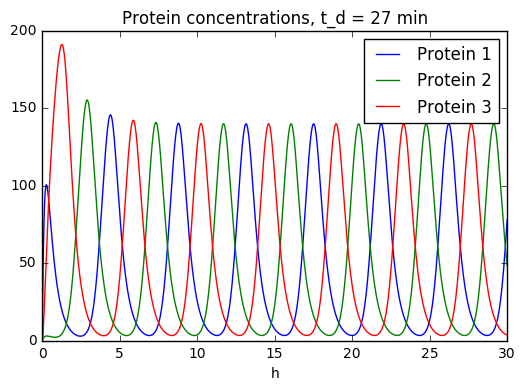

In [6]:
plt.figure()
plt.plot(t/60,y[:,3], label='Protein 1')
plt.plot(t/60,y[:,4], label='Protein 2')
plt.plot(t/60,y[:,5], label='Protein 3')
plt.xlabel('h')
plt.title('Protein concentrations, t_d = 27 min')
plt.legend()
plt.show()

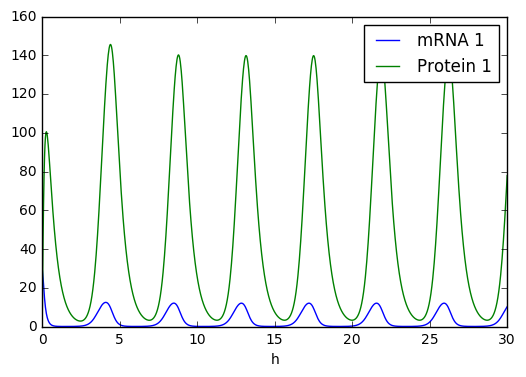

In [7]:
plt.figure()
plt.plot(t/60,y[:,0], label='mRNA 1')
plt.plot(t/60,y[:,3], label='Protein 1')
plt.xlabel('h')
plt.legend()
plt.show()

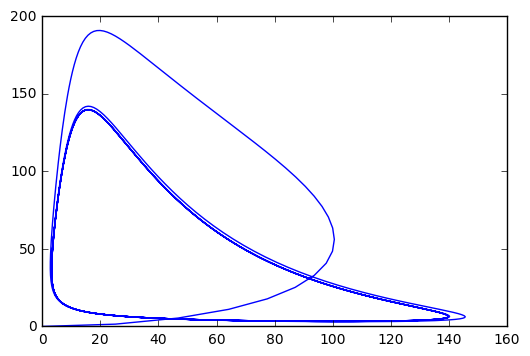

In [8]:
plt.plot(y[:,3],y[:,5]);